In [1]:
from upsetplot import generate_counts
from upsetplot import from_memberships

In [2]:
example = generate_counts()

In [7]:
example

cat0   cat1   cat2 
False  False  False      56
              True      283
       True   False    1279
              True     5882
True   False  False      24
              True       90
       True   False     429
              True     1957
Name: value, dtype: int64

In [8]:
example.to_dict()

{(False, False, False): 56,
 (False, False, True): 283,
 (False, True, False): 1279,
 (False, True, True): 5882,
 (True, False, False): 24,
 (True, False, True): 90,
 (True, True, False): 429,
 (True, True, True): 1957}

In [1]:
import pandas as pd
url = "https://gnps.ucsd.edu/ProteoSAFe/DownloadResultFile?task=62b32c4c5fd440a4802088da0d48b07c&file=clusterinfosummarygroup_attributes_withIDs_withcomponentID/"

df = pd.read_csv(url, sep="\t")

In [4]:
df.columns.to_list()
#df["ATTRIBUTE_OrganismID"]

['AllGroups',
 'DefaultGroups',
 'EvenOdd',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5',
 'G6',
 'GNPSLinkout_Cluster',
 'GNPSLinkout_Network',
 'LibraryID',
 'MQScore',
 'MZErrorPPM',
 'MassDiff',
 'RTMean',
 'RTStdErr',
 'Smiles',
 'SpectrumID',
 'UniqueFileSources',
 'UniqueFileSourcesCount',
 'cluster index',
 'componentindex',
 'number of spectra',
 'parent mass',
 'precursor charge',
 'precursor mass',
 'sum(precursor intensity)']

In [9]:
df["DefaultGroups"].head().to_list()

['G1', 'G1', 'G1', 'G1', 'G1']

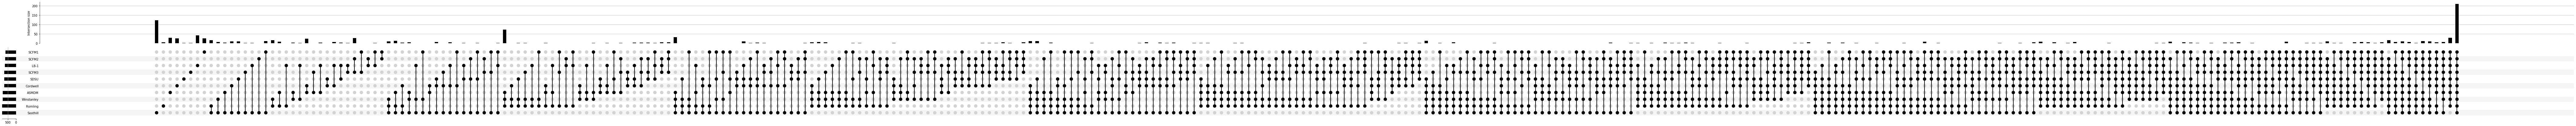

In [12]:
import pandas as pd
from upsetplot import generate_counts
from upsetplot import from_memberships
from upsetplot import plot
from matplotlib import pyplot
import uuid


gnps_task = "8443d633eb2447538cb977a7b271eaed"
metadata_column = "ATTRIBUTE_Media"

data_url = "https://gnps.ucsd.edu/ProteoSAFe/DownloadResultFile?task={}&file=clusterinfosummarygroup_attributes_withIDs_withcomponentID/".format(gnps_task)
data_df = pd.read_csv(data_url, sep="\t")

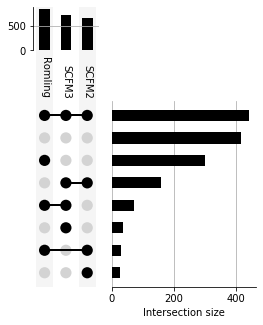

In [40]:
merged_terms = list(set(data_df[metadata_column].dropna()))

terms_to_consider = set()
for term in merged_terms:
    terms_to_consider = terms_to_consider | set(term.split(","))

metadata_terms = set(terms_to_consider)
metadata_terms = set(list(metadata_terms)[:3])

membership = []
for group_value in data_df[metadata_column].to_list():
    group_splits = set(group_value.split(","))
    group_splits = list(group_splits & metadata_terms)
    membership.append(group_splits)

upset_data_df = from_memberships(membership)
plotting_object = plot(upset_data_df, subset_size="count", sort_by="cardinality", orientation="vertical")

#uuid_save = str(uuid.uuid4())
#pyplot.savefig("./{}.png".format(uuid_save))

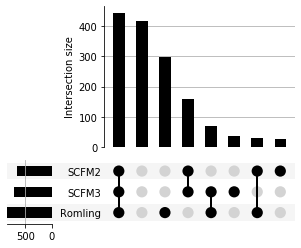

In [37]:
plotting_object = plot(upset_data_df, subset_size="count", sort_by="cardinality", totals_plot_elements=2)

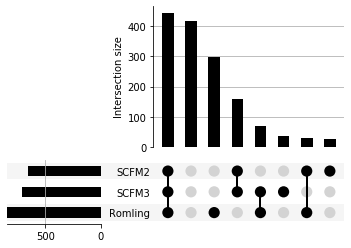

In [38]:
plotting_object = plot(upset_data_df, subset_size="count", sort_by="cardinality", totals_plot_elements=4)

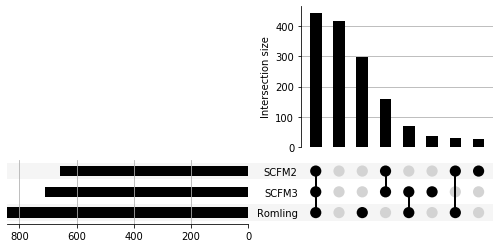

In [39]:
plotting_object = plot(upset_data_df, subset_size="count", sort_by="cardinality", totals_plot_elements=10)